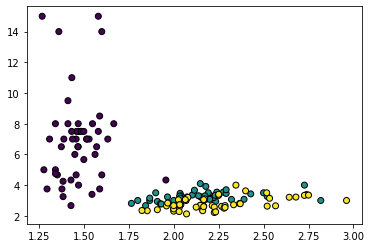

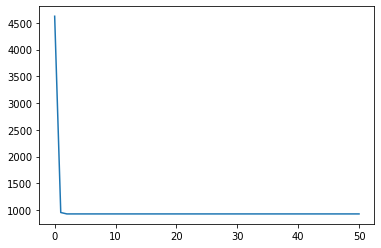

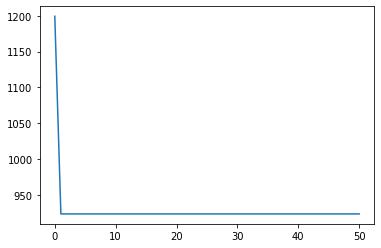

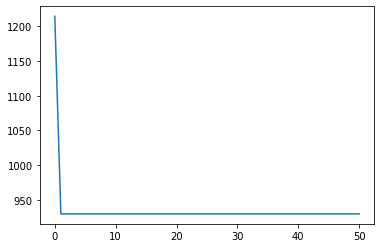

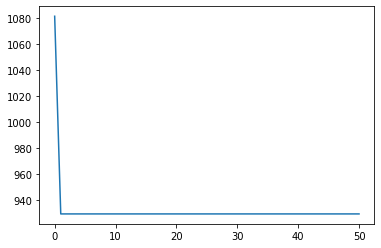

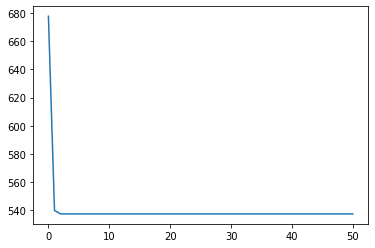

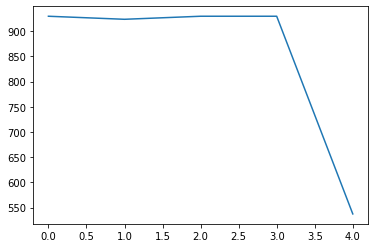

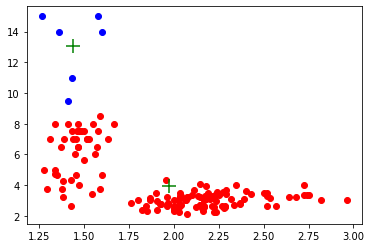

In [ ]:
import numpy as np
import scipy as sp
import math
import numpy
from sklearn import datasets
from matplotlib import pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividng sepal length / sepal width and petal length / petal width
for i in range(0, len(X)):
    X[i][0] /= X[i][1]
    X[i][2] /= X[i][3]

# Using only two features
data = X[:, [0, 2]]

# Plot shoing the data points in 3 clusters
plt.scatter(data[:, 0], data[:, 1], c=y, edgecolor='k')
plt.show()


def k_init(X, k):
    """ k-means++: initialization algorithm
    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features
    k: int
        The number of clusters
    Returns
    -------
    init_centers: array (k, d)
        The initialize centers for kmeans++
    """
    minimum_distance = [[0 for x in range(1)] for y in range(len(X))]
    centroids = np.empty((k, 2))
    # Take the first center randomly
    centroids[0] = data[np.random.randint(0, len(X)-1)]

    if (k == 1):
        return centroids
    for i in range(1, k):
        distance = [[0 for x in range(i)] for y in range(len(X))]
        for j in range(0, len(X)):
            empty = []
            for m in range(0, i):
                # Find distance between each point and each centroid
                distance[j][m] = numpy.linalg.norm(X[j, :]-centroids[m])
                if (m == 0):
                    minimum_distance[j][0] = distance[j][m]
                else:
                    for alpha in range(0, m+1):
                        empty.append(distance[j][alpha])
                    # Take minimum distance for multiple centroids
                    minimum_distance[j][0] = min(empty)
        for n in range(0, len(X)):
            # Square of distance
            minimum_distance[n][0] = minimum_distance[n][0] ** 2
        for n in range(1, len(X)):
            # Cumulative distance (cdf)
            minimum_distance[n][0] += minimum_distance[n-1][0]

        # Pick a number at random
        new = np.random.randint(0, int(minimum_distance[len(X)-1][0]))
        count = 0
        while (1):
            if (new <= minimum_distance[count][0]):
                break
            else:
                count += 1
        centroids[i] = X[count, :]
    return centroids


def k_means_pp(X, k, max_iter):
    """ k-means++ clustering algorithm
    step 1: call k_init() to initialize the centers
    step 2: iteratively refine the assignments
    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features
    k: int
        The number of clusters
    max_iter: int
        Maximum number of iteration
    Returns
    -------
    final_centers: array, shape (k, d)
        The final cluster centers
    """

    # Call k_init() to initialize the centers
    initialized_centers = k_init(X, k)

    # Call assign_data2clusters()
    data_map = assign_data2clusters(X, initialized_centers)
    clusters = np.zeros(len(data))
    updated_centroids = initialized_centers

    objective = []
    # Calculate initial objective
    objective.append(compute_objective(X, updated_centroids))

    for i in range(0, max_iter):
        # Assign data points for each iteration
        data_map = assign_data2clusters(X, updated_centroids)

        for x in range(len(X)):
            for y in range(k):
                if (data_map[x][y] == 1):
                    clusters[x] = y
        for a in range(k):
            updated_centroids[a] = np.mean(
                [X[j] for j in range(len(X)) if clusters[j] == a], axis=0)
        # Compute objective for each iteration
        objective.append(compute_objective(X, updated_centroids))
    plt.plot(objective)
    plt.show()

    return updated_centroids


def assign_data2clusters(X, C):
    """ Assignments of data to the clusters
    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features
    C: array, shape(k ,d)
        The final cluster centers
    Returns
    -------
    data_map: array, shape(n, k)
        The binary matrix A which shows the assignments of data points (X) to
        the input centers (C).
    """

    clusters = np.zeros(len(data))
    data_map = [[0 for x in range(len(C))] for y in range(len(X))]
    distance = data_map

    for i in range(len(X)):
        for j in range(len(C)):
            # Calculate distance from point to all centroids
            distance[i][j] = numpy.linalg.norm(X[i]-C[j])
        for k in range(len(C)):
            distances = np.array(distance[i])
            # Take argmin to assign it to a cluster
        clusters[i] = np.argmin(distances)
    clusters = clusters.astype(int)

    # Convert the clusters into a binary data map
    for i in range(0, len(X)):
        for j in range(len(C)):
            if (clusters[i] == j):
                data_map[i][j] = 1
    return data_map


def compute_objective(X, C):
    """ Compute the clustering objective for X and C
    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features
    C: array, shape(k ,d)
        The final cluster centers
    Returns
    -------
    accuracy: float
        The objective for the given assigments
    """

    distance_objective = [[0 for x in range(len(C))] for y in range(len(X))]
    sum = 0

    for i in range(len(X)):
        for j in range(len(C)):
            # Calculate distance
            distance_objective[i][j] = numpy.linalg.norm(X[i]-C[j])
        for k in range(len(C)):
            distances = np.array(distance_objective[i])
            # Squared sum
            sum += (min(distances)) ** 2
    return sum


centroids = []
for k in range(1, 6):
    centroids.append(k_means_pp(data, 2, 50))

objectives = []
for k in range(0, 5):
    objectives.append(compute_objective(data, centroids[k]))

plt.plot(objectives)
plt.show()
plt.clf()

# Plot of data points in clusters and their centers for k=3.
data_map_3 = assign_data2clusters(data, centroids[2])

clusters_3 = np.zeros(len(data))
for x in range(len(data)):
    for y in range(len(centroids[2])):
        if data_map_3[x][y] == 1:
            clusters_3[x] = y

points = [data[j] for j in range(len(data)) if clusters_3[j] == 0]
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c='r')

points = [data[j] for j in range(len(data)) if clusters_3[j] == 1]
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c='b')

points = [data[j] for j in range(len(data)) if clusters_3[j] == 2]
points = np.array(points)
plt.scatter(points, points, c='g')

centroids3 = np.array(centroids[2])
plt.scatter(centroids3[:, 0], centroids3[:, 1], s=200, c='green', marker='+')
plt.show()